# Simple Viz

In [1]:
!pip install -q dtreeviz

In [1]:
import pandas as pd
from dtreeviz.trees import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import *
from sklearn import tree
import matplotlib.pyplot as plt
import dtreeviz

In [2]:
iris = load_iris()

X_train = iris.data
y_train = iris.target

In [17]:
cls = DecisionTreeClassifier(max_depth=None,criterion= 'gini',splitter = 'best')

cls.fit(X_train, y_train)

DecisionTreeClassifier()

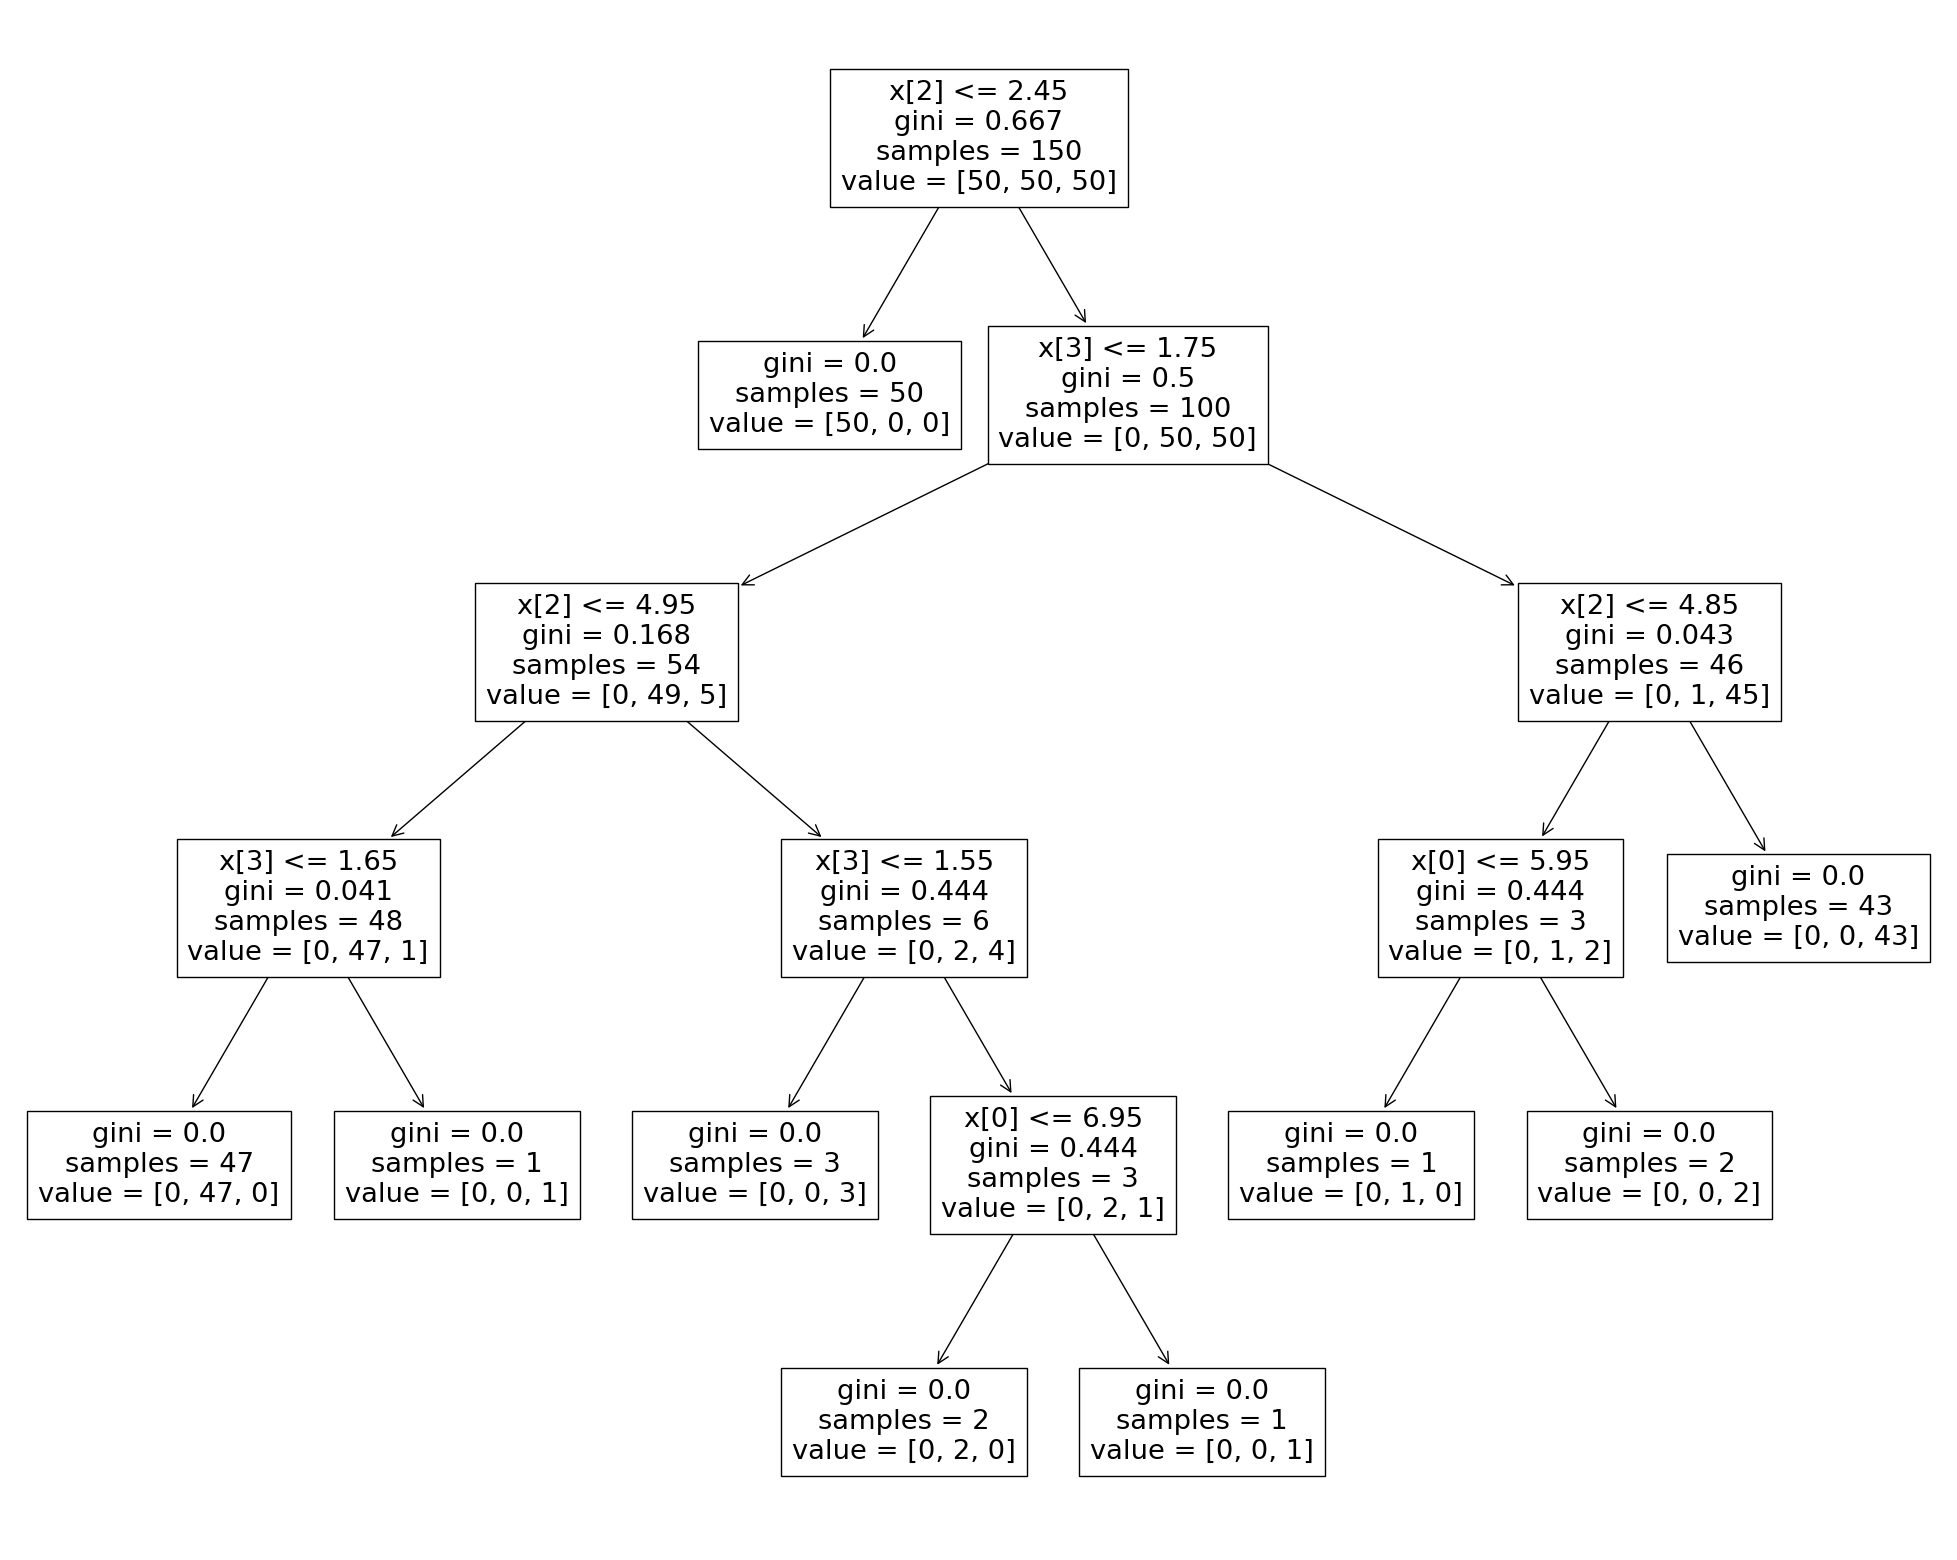

In [14]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(cls)

# Dtreeviz Lib Viz

In [18]:
viz_model = dtreeviz.model(cls, X_train, y_train, target_name=["setosa", "versicolor", "virginica"], feature_names=iris.feature_names)

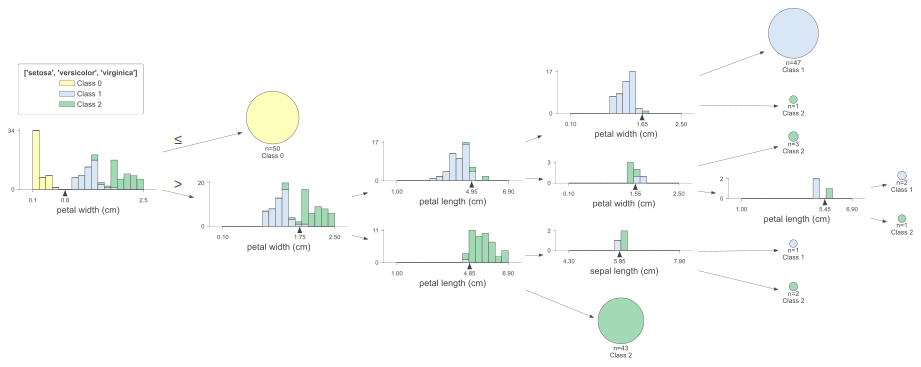

In [19]:
viz_model.view(orientation='LR')

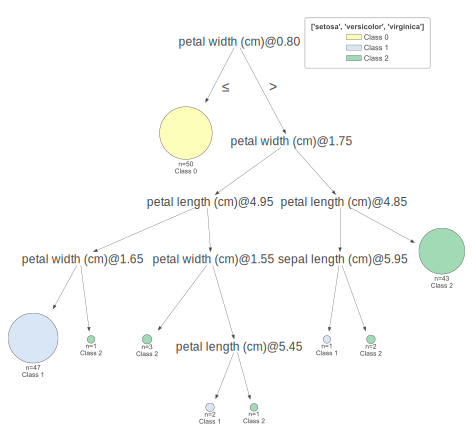

In [20]:
viz_model.view(fancy=False)

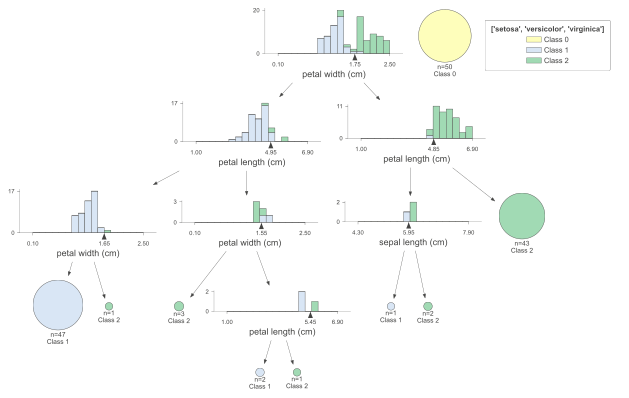

In [21]:
viz_model.view(depth_range_to_display=(1,100))

In [27]:
X_train[124]

array([6.7, 3.3, 5.7, 2.1])

In [28]:
x = X_train[124]

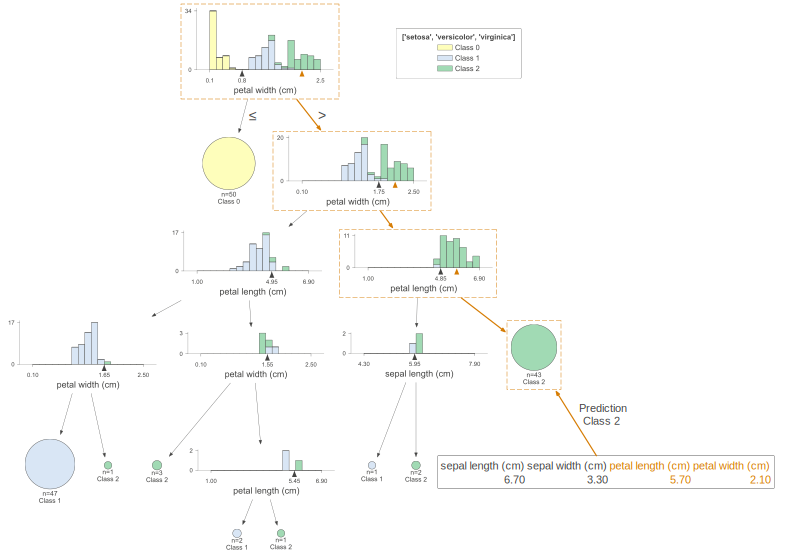

In [29]:
viz_model.view(x=x)

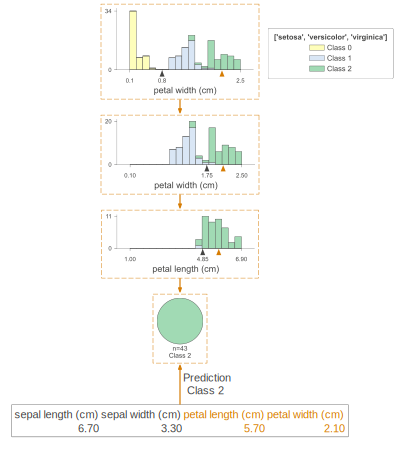

In [30]:
viz_model.view(x=x, show_just_path=True)

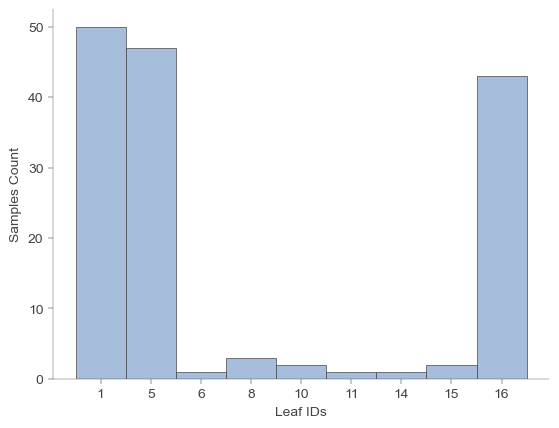

In [28]:
viz_model.leaf_sizes()

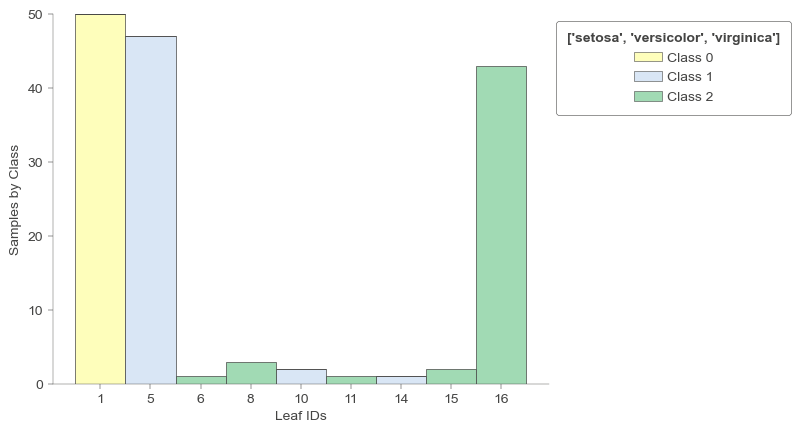

In [31]:
viz_model.ctree_leaf_distributions()

# Decision Tree Regressor

In [32]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV

In [33]:
housing_data = fetch_california_housing()
df = pd.DataFrame(housing_data.data)

In [34]:
df.columns = housing_data.feature_names
df['Target'] =housing_data.target

In [36]:
df.shape

(20640, 9)

In [37]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [41]:
rt = DecisionTreeRegressor(criterion= 'absolute_error', max_depth=5)

In [42]:
rt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=5)

In [43]:
y_pred = rt.predict(X_test)
r2_score(y_test,y_pred)

0.568237111838965

# Hyperparameter Tuning

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [44]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['friedman_mse','squared_error'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [45]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

In [46]:
reg.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [47]:
reg.best_score_

0.46149607986708385

In [48]:
reg.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 1.0,
 'min_samples_split': 0.25}

In [49]:
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns),reverse=True):
    print (name, importance)   

MedInc 0.7480358331647982
AveOccup 0.11607101753724668
AveRooms 0.06268892349638697
Latitude 0.029897167413578018
HouseAge 0.020798094425983755
Longitude 0.020517733817586297
Population 0.001336379273594745
AveBedrms 0.0006548508708255118
